# Import needed libraries

In [132]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [133]:
# Read dataset into dataframe

data = pd.read_csv("titanic_train.csv")

# Descriptive Statistics




In [134]:
data.describe(include ='all')

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
count,850.000000,850.00000,850,850,676.000000,850.000000,850.000000,850,849.000000,191,849,308,73.000000,464,850.000000
unique,NaN,NaN,849,2,NaN,NaN,NaN,660,NaN,135,3,26,NaN,272,NaN
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,D,S,4,NaN,"New York, NY",NaN
freq,NaN,NaN,2,551,NaN,NaN,NaN,10,NaN,4,589,25,NaN,36,NaN
mean,662.816471,2.32000,NaN,NaN,29.519847,0.522353,0.382353,NaN,34.012701,NaN,NaN,NaN,165.821918,NaN,0.368235
std,380.751936,0.83853,NaN,NaN,14.562243,1.112132,0.879511,NaN,53.705779,NaN,NaN,NaN,99.068487,NaN,0.482610
min,1.000000,1.00000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,4.000000,NaN,0.000000
25%,332.250000,2.00000,NaN,NaN,20.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,75.000000,NaN,0.000000
50%,676.500000,3.00000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.108300,NaN,NaN,NaN,166.000000,NaN,0.000000
75%,992.250000,3.00000,NaN,NaN,37.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,NaN,260.000000,NaN,1.000000


In [135]:
data.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [136]:
# Rough idea of datatypes present in data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


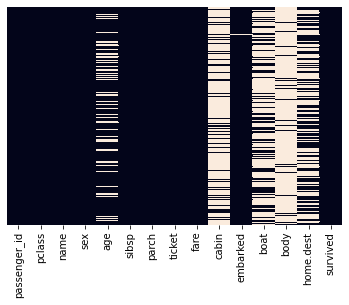

In [137]:
# Finding null values with heatmap visualization

sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [138]:
# Get percentage of null values

data.isnull().mean().round(4) * 100

passenger_id     0.00
pclass           0.00
name             0.00
sex              0.00
age             20.47
sibsp            0.00
parch            0.00
ticket           0.00
fare             0.12
cabin           77.53
embarked         0.12
boat            63.76
body            91.41
home.dest       45.41
survived         0.00
dtype: float64

### 'Age' Imputation (Median or Mean..?)

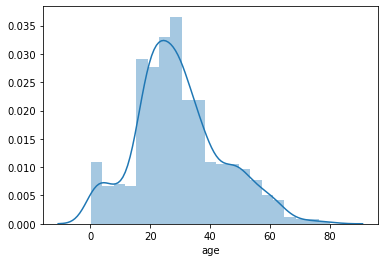

In [139]:
# First check the distribution

sns.distplot(data.age)

In [140]:
data.describe()

,passenger_id,pclass,age,sibsp,parch,fare,body,survived
count,850.000000,850.00000,676.000000,850.000000,850.000000,849.000000,73.000000,850.000000
mean,662.816471,2.32000,29.519847,0.522353,0.382353,34.012701,165.821918,0.368235
std,380.751936,0.83853,14.562243,1.112132,0.879511,53.705779,99.068487,0.482610
min,1.000000,1.00000,0.166700,0.000000,0.000000,0.000000,4.000000,0.000000
25%,332.250000,2.00000,20.000000,0.000000,0.000000,7.895800,75.000000,0.000000
50%,676.500000,3.00000,28.000000,0.000000,0.000000,14.108300,166.000000,0.000000
75%,992.250000,3.00000,37.000000,1.000000,0.000000,31.000000,260.000000,1.000000
max,1307.000000,3.00000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [141]:
# Check if median and mean age for grouped by SEX & PCLASS is more or less constant

print(data.groupby(['sex', 'pclass'])['age'].agg(['mean', 'median']).round(1))

               mean  median
sex    pclass              
female 1       38.1    36.0
       2       27.0    27.5
       3       21.3    22.0
male   1       40.0    41.0
       2       29.7    29.0
       3       26.0    25.0


# Create new data frame to hold cleaned data


In [142]:
# Cleaned data

Clean_df = data

In [143]:
# Median AGE differs greatly for PCLASS hence use group imputation

by_sex_class = Clean_df.groupby(['sex', 'pclass'])

In [144]:
# define function for median imputation

def impute_median(series):
    return series.fillna(series.median())

In [145]:
# impute median

Clean_df.age = by_sex_class['age'].transform(impute_median)

In [146]:
# check if imputation was successful


Clean_df.isnull().mean().round(4) * 100

passenger_id     0.00
pclass           0.00
name             0.00
sex              0.00
age              0.00
sibsp            0.00
parch            0.00
ticket           0.00
fare             0.12
cabin           77.53
embarked         0.12
boat            63.76
body            91.41
home.dest       45.41
survived         0.00
dtype: float64

### 'Cabin' Imputation: Perhaps replace values to 1(has cabin) & 0(has no cabin))??

In [147]:
# create new column for "NewCabin" values where Non-null values are replaced with 1

Clean_df['NewCabin'] = Clean_df['cabin'].apply(lambda x: 1 if not pd.isnull(x) else np.nan)

In [149]:
# replace Null values with 0

Clean_df['NewCabin'] = Clean_df['NewCabin'].fillna(0)

In [150]:
# check if successful

Clean_df.tail()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,NewCabin
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.000,C39,S,NaN,NaN,London / Birmingham,0,1.0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.700,B37,C,NaN,258.0,"Buffalo, NY",0,1.0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.000,NaN,S,12,NaN,"Moscow / Bronx, NY",1,0.0
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.775,NaN,S,NaN,NaN,NaN,0,0.0
849,425,2,"Greenberg, Mr. Samuel",male,52.0,0,0,250647,13.000,NaN,S,NaN,19.0,"Bronx, NY",0,0.0


In [152]:
Clean_df.isnull().mean().round(4) * 100

passenger_id     0.00
pclass           0.00
name             0.00
sex              0.00
age              0.00
sibsp            0.00
parch            0.00
ticket           0.00
fare             0.12
cabin           77.53
embarked         0.12
boat            63.76
body            91.41
home.dest       45.41
survived         0.00
NewCabin         0.00
dtype: float64

### 'Boat': undergo same process as 'Cabin'

In [153]:
# create new column for "NewCabin" values where Non-null values are replaced with 1

Clean_df['NewBoat'] = Clean_df['boat'].apply(lambda x: 1 if not pd.isnull(x) else np.nan)

In [154]:
# replace Null values with 0

Clean_df['NewBoat'] = Clean_df['NewBoat'].fillna(0)

In [155]:
Clean_df.tail()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,NewCabin,NewBoat
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.000,C39,S,NaN,NaN,London / Birmingham,0,1.0,0.0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.700,B37,C,NaN,258.0,"Buffalo, NY",0,1.0,0.0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.000,NaN,S,12,NaN,"Moscow / Bronx, NY",1,0.0,1.0
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.775,NaN,S,NaN,NaN,NaN,0,0.0,0.0
849,425,2,"Greenberg, Mr. Samuel",male,52.0,0,0,250647,13.000,NaN,S,NaN,19.0,"Bronx, NY",0,0.0,0.0


### 'home.dest': Replace Null values with "Unknown"

In [159]:
# replace Null values with "unknown"

Clean_df['NewHome'] = Clean_df['home.dest'].fillna("unknown")

### 'embarked': Replace Null values with 0

In [161]:
Clean_df['NewEmbarked'] = Clean_df['embarked'].fillna(0)

### 'fare': Perhaps we more analysis should be done to determine fare rates..?

### 'Body': ......tempted to drop....too many null values😂!!!

In [162]:
data

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,NewCabin,NewBoat,NewHome,NewEmbarked
0,1216,3,"Smyth, Miss. Julia",female,22.0,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1,0.0,1.0,unknown,Q
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0,0.0,0.0,Croatia,S
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0,0.0,0.0,unknown,S
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1,0.0,1.0,"Cornwall / Akron, OH",S
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0,0.0,0.0,"Barre, Co Washington, VT",S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,C39,S,NaN,NaN,London / Birmingham,0,1.0,0.0,London / Birmingham,S
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C,NaN,258.0,"Buffalo, NY",0,1.0,0.0,"Buffalo, NY",C
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S,12,NaN,"Moscow / Bronx, NY",1,0.0,1.0,"Moscow / Bronx, NY",S
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,NaN,NaN,NaN,0,0.0,0.0,unknown,S


## Drop old Null columns

In [167]:
Clean_df = Clean_df.drop(['embarked','home.dest', 'cabin', 'boat', 'body'], axis = 1)

In [168]:
Clean_df.isnull().mean().round(4) * 100

passenger_id    0.00
pclass          0.00
name            0.00
sex             0.00
age             0.00
sibsp           0.00
parch           0.00
ticket          0.00
fare            0.12
survived        0.00
NewCabin        0.00
NewBoat         0.00
NewHome         0.00
NewEmbarked     0.00
dtype: float64